# Logistic Regression: What and Why?

**Logistic Regression is a classification algorithm used to predict the outcome of a categorical dependent variable. It produces results in a binary format, meaning the output is discrete rather than continuous.**

It is typically used when the target variable has two possible outcomes, such as:

- 0 or 1

- Yes or No

- True or False

- High or Low

**Logistic Regression estimates the probability that a given input belongs to a particular class and assigns the label based on that probability.**

# Why Not Linear Regression for Classification

Linear regression is not ideal for classification tasks because it predicts continuous values. In binary classification, the output must be between 0 and 1. Linear regression does not naturally restrict predictions to this range, which can lead to values less than 0 or greater than 1. Clipping these values is not reliable for decision making. Because of this limitation, logistic regression, which uses a sigmoid function to keep outputs between 0 and 1, is preferred.

- We get a Sigmod curve as a result
- Threshold value will be fixed so that it can be classified easily

# Logistic Regression Curve

- Logistic Regression uses the sigmoid function to convert predictions into probabilities between 0 and 1.

- The sigmoid curve has an S shape, rising slowly at first, then faster, and finally leveling off.

- The output of the sigmoid represents the probability of belonging to a particular class.

- A threshold value (commonly 0.5) is used to turn probabilities into class labels.

- Values above the threshold are classified as class 1, and values below it are classified as class 0.

- This threshold helps decide outcomes such as win or lose, yes or no, or true or false.

# Logistic Regression Equation: 

- Logistic Regression starts from the straight line equation:
Y = C + B1X1 + B2X2 + …

- Linear regression outputs values from minus infinity to plus infinity.

- Logistic Regression requires outputs between 0 and 1 because it predicts probabilities.

- To convert Y into a 0 to infinity range, the transformation Y / (1 − Y) is used.

- Applying the logarithm gives the logit function:
log(Y / (1 − Y)) = C + B1X1 + B2X2 + …

- This becomes the final Logistic Regression equation, which maps linear combinations of inputs to probability values.

# Logistic Regression: Use Cases

- Used for predicting binary outcomes such as illness detection.

- Helps in classifying objects into categories, for example types of animals.

- Applied in medical diagnosis systems, such as MRI based disease prediction.

- Useful in weather based classification tasks such as predicting rain or no rain.

## Step by step Implementation

### Step-1: Import libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

### Collecting the Data 

In [7]:
titanic_data = pd.read_csv("Titanic.csv")

In [9]:
titanic_data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [10]:
print("# of passengers in original data:" +str(len(titanic_data.index)))

# of passengers in original data:891


### Analyzing Data

<Axes: xlabel='survived', ylabel='count'>

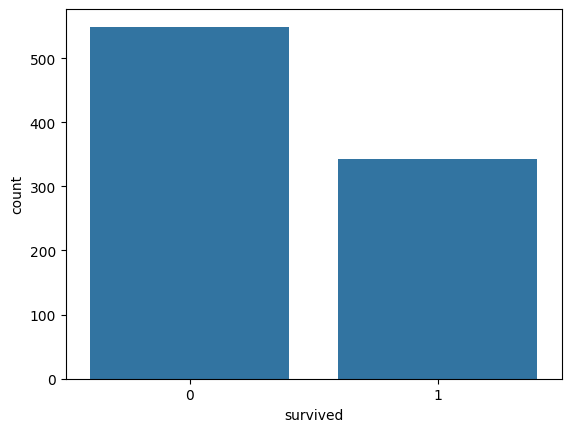

In [14]:
sns.countplot(x="survived" , data = titanic_data)

<Axes: xlabel='survived', ylabel='count'>

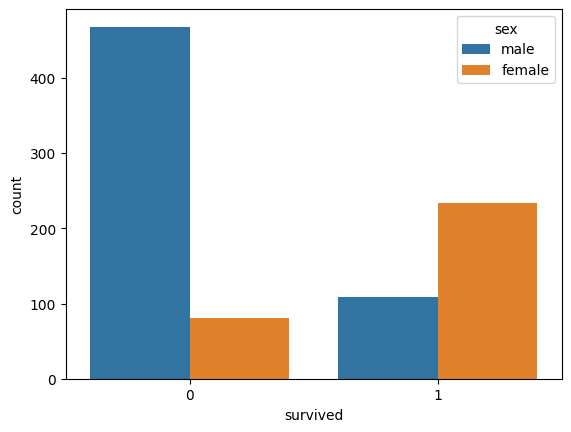

In [15]:
sns.countplot(x = 'survived' , hue = 'sex' , data = titanic_data)

<Axes: xlabel='survived', ylabel='count'>

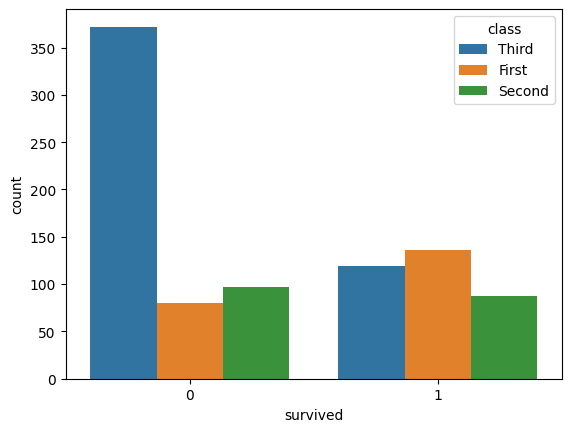

In [17]:
sns.countplot(x = 'survived' , hue = 'class' , data = titanic_data)

<Axes: ylabel='Frequency'>

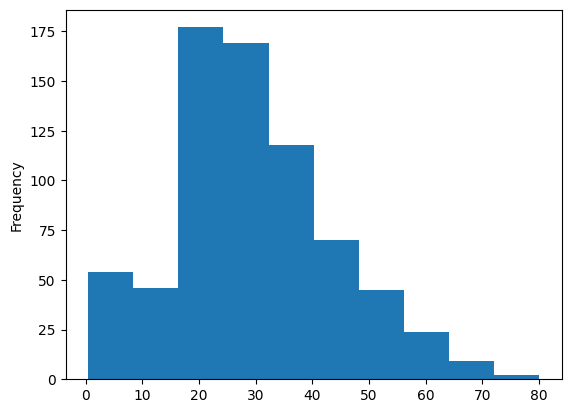

In [18]:
titanic_data['age'].plot.hist()

<Axes: ylabel='Frequency'>

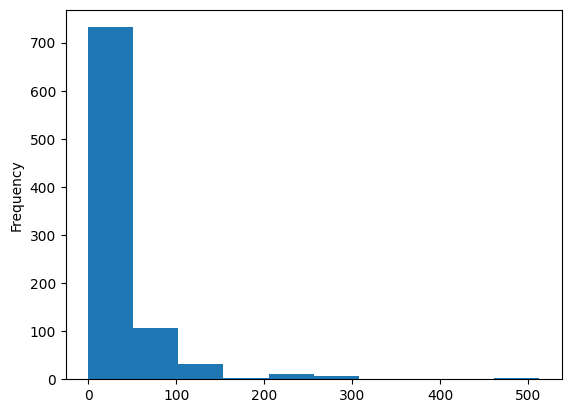

In [22]:
titanic_data['fare'].plot.hist()

In [24]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [25]:
titanic_data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='sibsp', ylabel='count'>

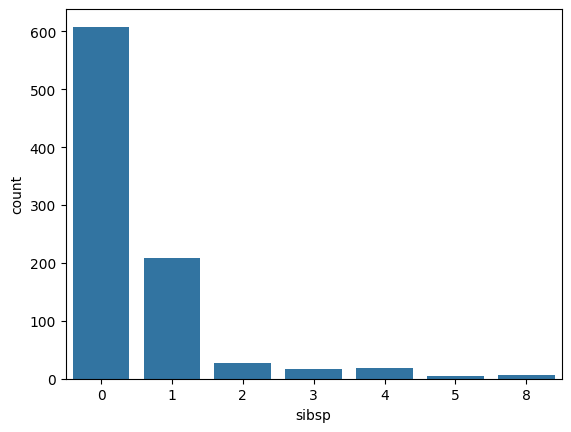

In [28]:
sns.countplot(x = 'sibsp' , data = titanic_data)

<Axes: xlabel='parch', ylabel='count'>

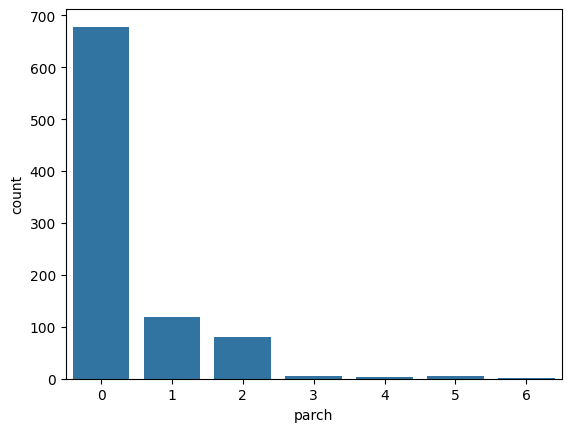

In [29]:
sns.countplot(x = 'parch' , data = titanic_data)